# Pairs Trading Project

In this project, we have tried to reduce one of our most complex trading problems to a fairly simple form. 

Ultimately, you will get to work with real market data, identify patterns and then come up with a trading strategy.

### The Problem

A trader has noticed a correlation between the instruments X and Y, and thinks we could make money by trading them when the prices diverge too much. Your job is to explore this opportunity and evaluate whether such a strategy could work.

The above statement is intentionally reductive and Optiver typically seeks to embded such strategies in our market making activities. Our goal, overall, is to provide liquidity to markets, but understanding the structure and correlation of the instruments we trade enables us to do so profitably.

### The Data

Here we import some useful Python packages and bring in the data.

In [7]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the csv of data into a pandas dataframe
df = pd.read_csv('final_data_10s.csv')

There's a fair bit of data! Let's have a look at some high level properties of this dataframe.

In [2]:
df.shape

(737739, 9)

In [3]:
df.columns

Index(['Time', 'X_BID', 'X_BID_VOL', 'X_ASK', 'X_ASK_VOL', 'Y_BID',
       'Y_BID_VOL', 'Y_ASK', 'Y_ASK_VOL'],
      dtype='object')

In [4]:
df.info


<bound method DataFrame.info of                        Time     X_BID  X_BID_VOL     X_ASK  X_ASK_VOL  \
0       2019-11-18 08:00:00  106340.0       15.0  106348.0       11.0   
1       2019-11-18 08:00:10  106312.0        6.0  106320.0        9.0   
2       2019-11-18 08:00:20  106312.0        7.0  106320.0       12.0   
3       2019-11-18 08:00:30  106336.0       22.0  106340.0        1.0   
4       2019-11-18 08:00:40  106352.0        2.0  106356.0        4.0   
...                     ...       ...        ...       ...        ...   
737734  2020-12-31 09:59:20  109140.0        2.0  109144.0        1.0   
737735  2020-12-31 09:59:30  109144.0        1.0  109168.0       21.0   
737736  2020-12-31 09:59:40  109120.0        4.0  109144.0        1.0   
737737  2020-12-31 09:59:50  109092.0        2.0  109104.0        5.0   
737738  2020-12-31 10:00:00  109148.0        2.0  109164.0        1.0   

           Y_BID  Y_BID_VOL     Y_ASK  Y_ASK_VOL  
0       105200.0        9.0  105210.0   

<AxesSubplot:xlabel='Time'>

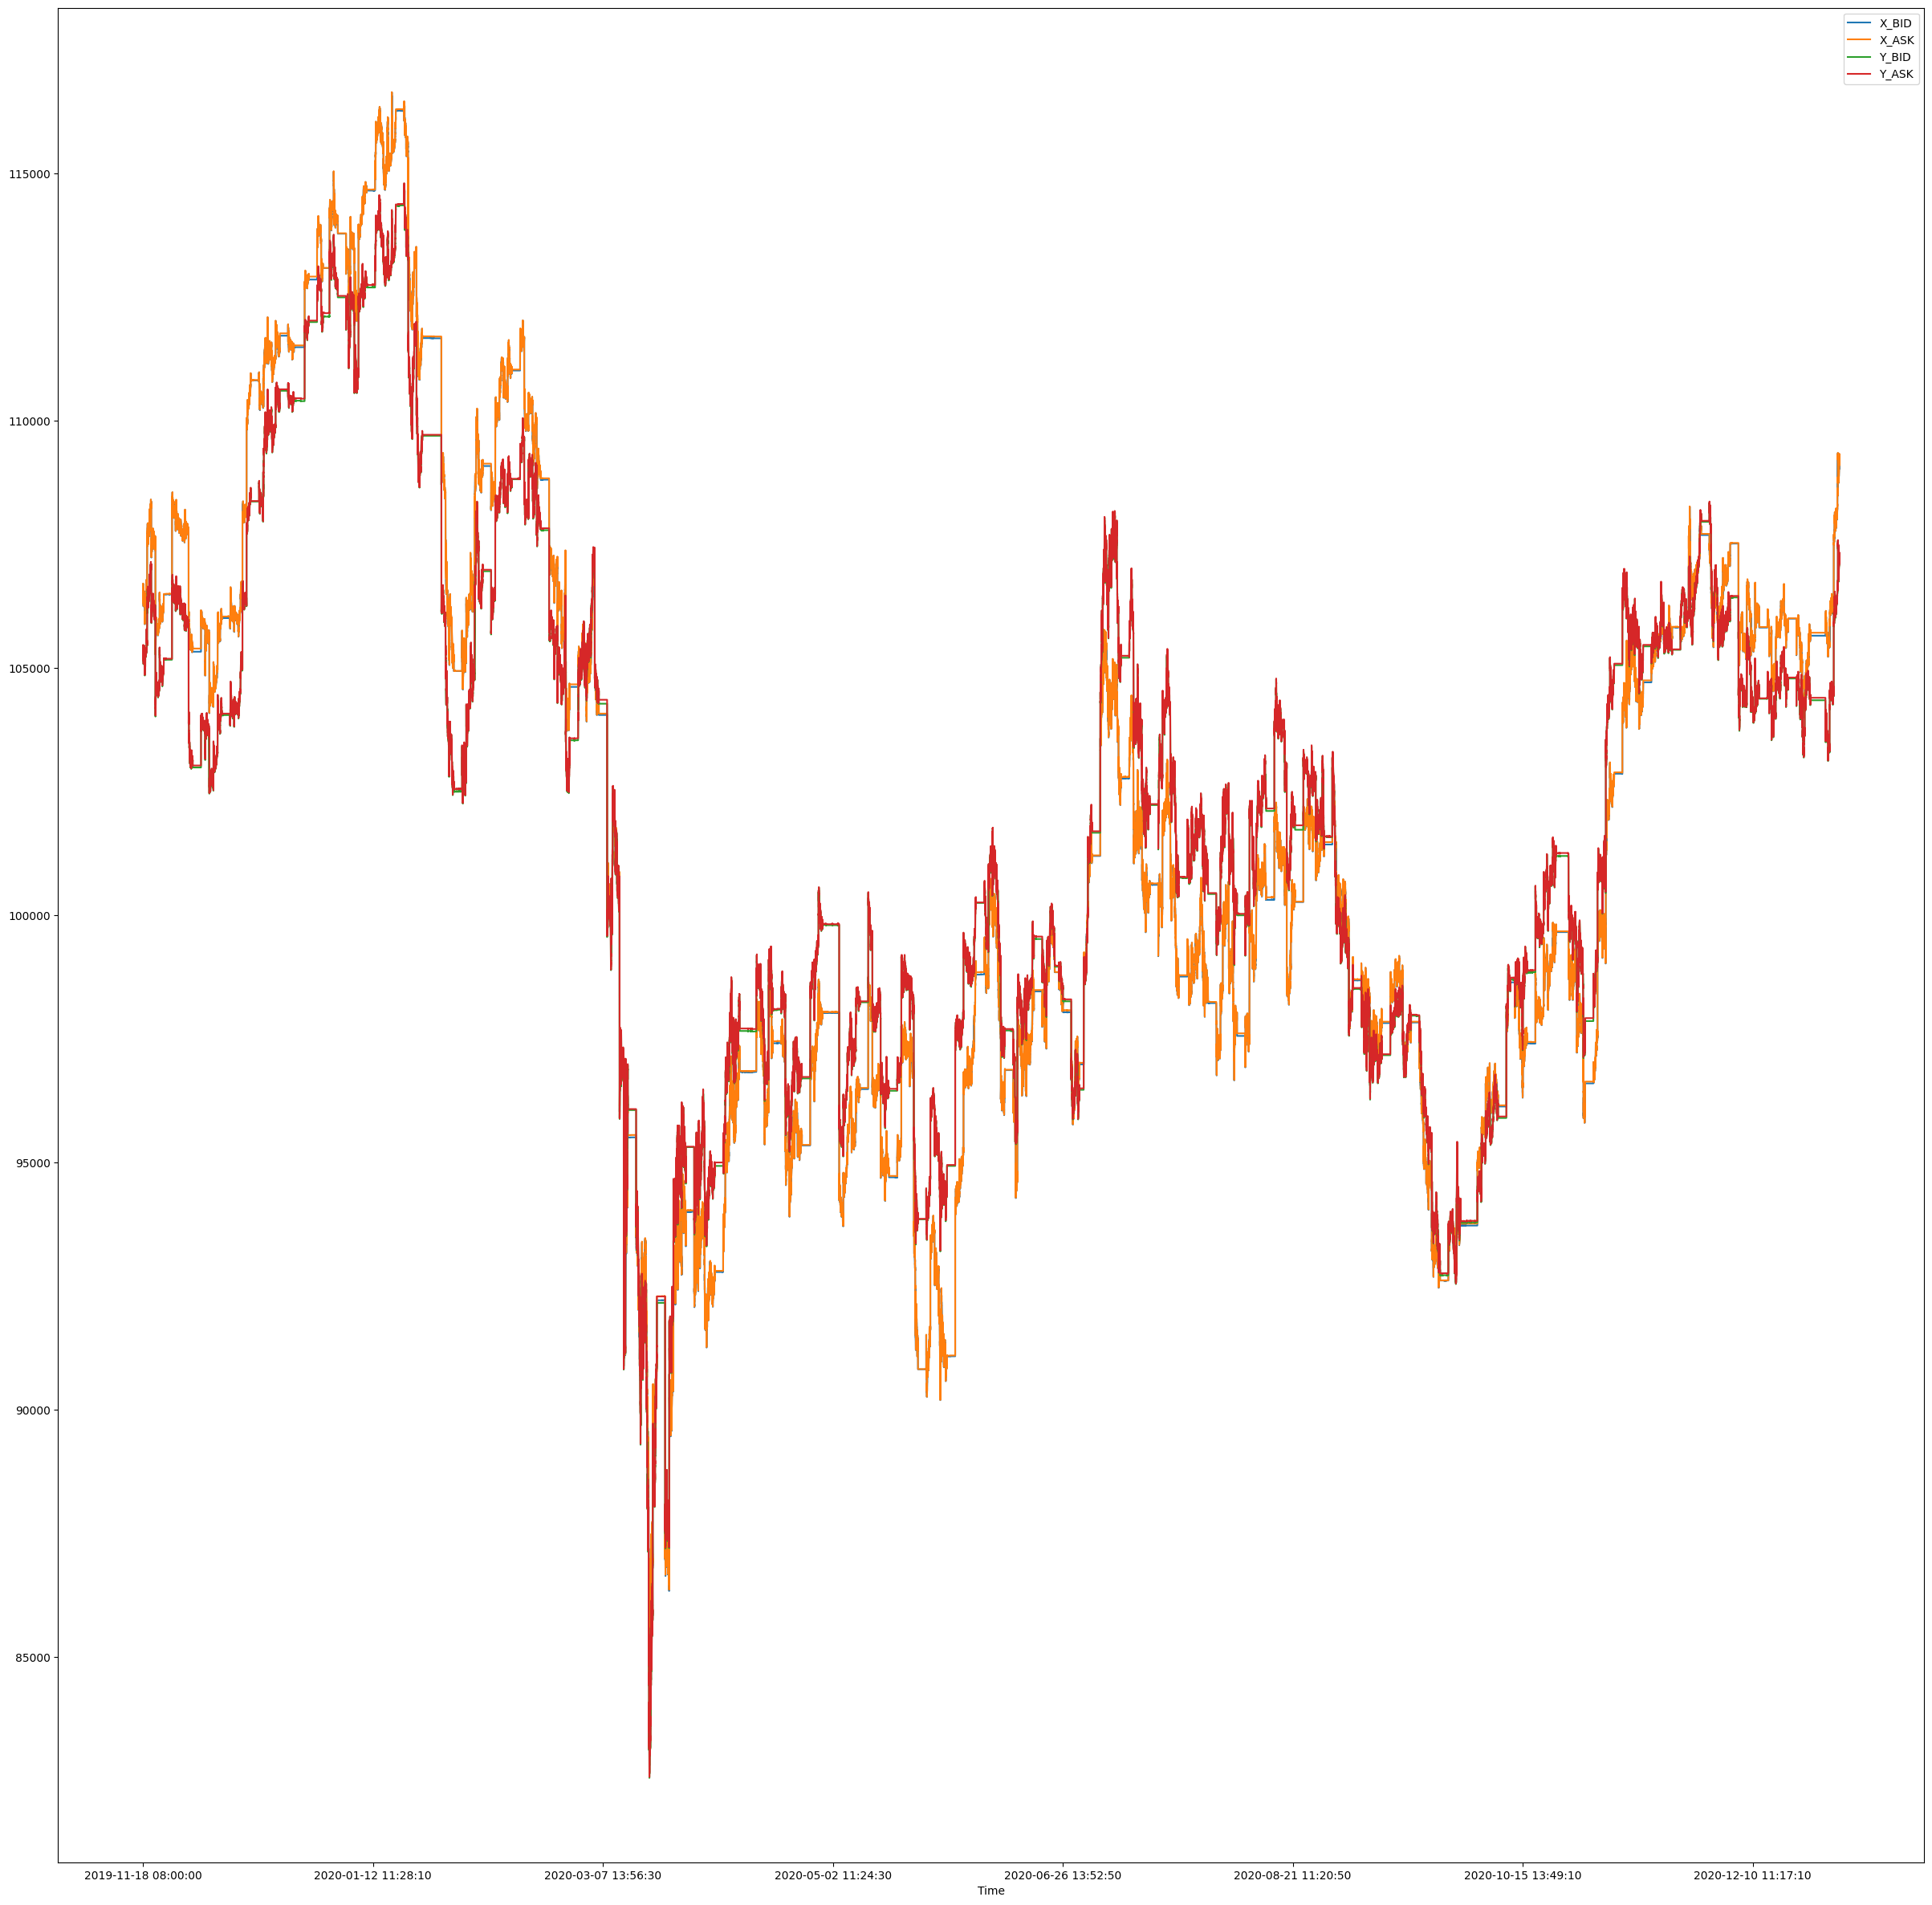

In [14]:

df.plot (x="Time", y=["X_BID", "X_ASK", "Y_BID", "Y_ASK"], figsize=(30,30))


0         1140.0
1         1132.0
2         1142.0
3         1146.0
4         1152.0
           ...  
737734    1950.0
737735    1974.0
737736    1950.0
737737    1912.0
737738    1908.0
Length: 737739, dtype: float64


<AxesSubplot:>

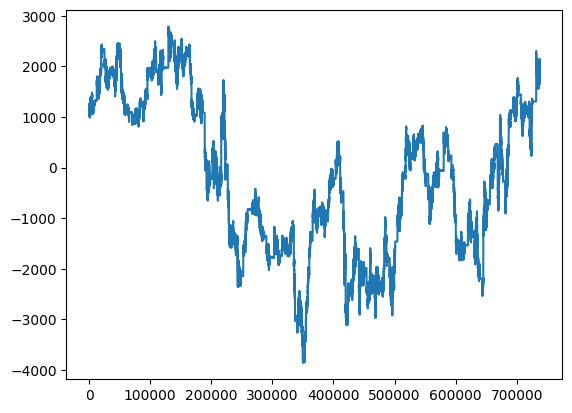

In [12]:
diff_bid = df["X_BID"] - df["Y_BID"]
diff_ask = df["X_ASK"] - df["Y_ASK"]

print (diff_bid)
diff_bid.plot ()

<AxesSubplot:>

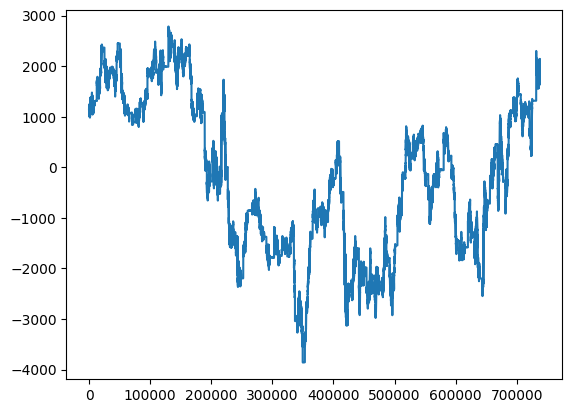

In [13]:
diff_ask.plot ()

### Some helpful notes on the data

For each of the two instruments X and Y, you are provided 10 second snapshots of the top level of the *market depth*.

The columns are specifically defined as follows:

* **BID** = the highest price at which someone in the market is willing to buy.
* **BID_VOL** = the total number of contracts that are willing to buy at price BID.
* **ASK** = the lowest price at which someone in the market is willing to sell.
* **ASK_VOL** = total number of contracts that are willing to sell at price ASK.

Note that this means that if you wish to sell right at a particular timestamp, the best price you can sell against is **BID**, and the number of contracts you can sell is **BID_VOL**, since in total all participants are willing to buy **BID_VOL** contracts at price **BID**.

Note that whilst the market is open, **ASK** must be strictly **> BID** for otherwise a trade execution would occur.

We do not include a list of *trade executions* in this dataset.

### The Objective

Your goals are:

**Dataset Exploration**
* Explore the dataset and present the findings (e.g. anomalies, correlations, periodic patterns).

**Pricing Relationships**
* Identify potential pricing signals based on the relationships/patterns discovered in the previous step.
* Develop and test whether these signals are a good predictor of future.

**Trading Strategy**
* Based on your findings above, describe how you would monetise the opportunity.
* Describe metrics you can use to measure performance of the strategy.
* Plot the profit of your trading strategy over time.
* Highlight limitations of the signals and strategy.
* Provide potential areas for further research.

### Some Notes

* You are able to take long or short positions on X and Y.
* The units of all prices are listed in AUD.
* The units of all volumes are in number of contracts. This means that if you sell 2 contracts at price 100100, and buy them back at price 100000, your profit is 200 AUD.
* X and Y, like many financial instruments, do *not* trade 24 hours a day, nor 7 days a week.
* There are a lot of pair trading examples available online, (e.g. https://github.com/KidQuant/Pairs-Trading-With-Python/blob/master/PairsTrading.ipynb). While useful as a simple starting point, we stress that these examples don’t consider the intricacies of the dataset used in the project. 
* If you use a statistical library (e.g. to test for co-integration) then make sure you understand how the procedure works and why you chose to use it. Don’t simply copy code found online. 

# Project Work

In [6]:
# Insert analysis fun times here!


from statsmodels.tsa.stattools import coint, adfuller

X_BID = df["X_BID"] 
Y_BID = df["Y_BID"] 
X_ASK = df["X_ASK"] 
Y_ASK = df["Y_ASK"] 

score, pvalue, _ = coint(X_BID[:100000],Y_BID[:100000])
print("BID cointegration: ", pvalue)

BID cointegration:  0.5817284281668152


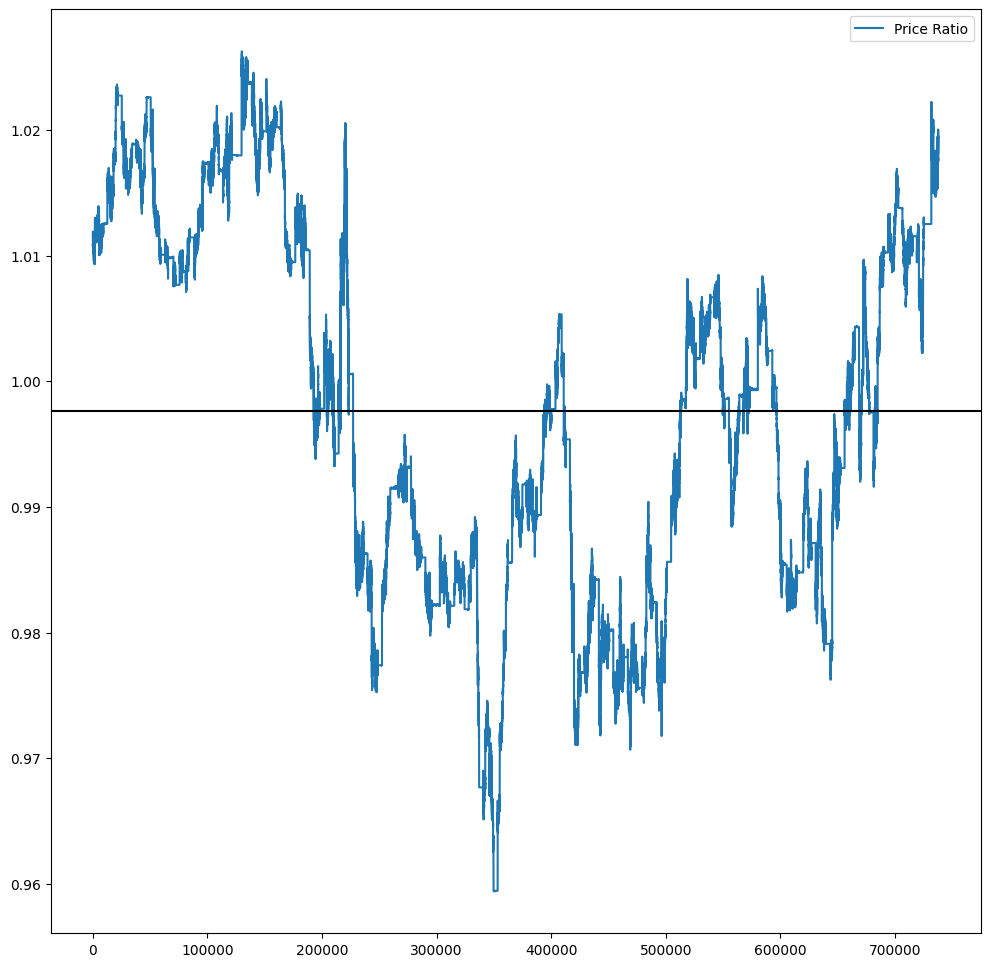

In [9]:
import matplotlib.pyplot as plt

ratio = X_BID/Y_BID
ratio.plot(figsize=(12,12))
plt.axhline(ratio.mean(), color='black')
# plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio']);

# Conclusions and Insights

# Your Trading Strategy

In [13]:
# Trade using a simple strategy
def trade(X, Y, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = X["X_BID"]/Y["Y_BID"]
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countX = 0
    countY = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += X["X_BID"][i] - Y["Y_ASK"][i]
            countX -= 1 #TODO: but how many unit do we sell?
            countY += ratios[i]
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= X["X_ASK"][i] - Y["Y_BID"][i]
            countX += 1 #TODO: but how many unit do we buy?
            countY -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += X["X_BID"][i] * countX + Y["Y_BID"][i] * countY
            # print(money)
            countX = 0
            countY = 0
            
            
    return money

In [14]:
X = df.loc[:, ["Time", "X_BID", "X_BID_VOL", "X_ASK", "X_ASK_VOL"]]
Y = df.loc[:, ["Time", "Y_BID", "Y_BID_VOL", "Y_ASK", "Y_ASK_VOL"]]
print (X)

trade (X, Y, 60, 5)

                       Time     X_BID  X_BID_VOL     X_ASK  X_ASK_VOL
0       2019-11-18 08:00:00  106340.0       15.0  106348.0       11.0
1       2019-11-18 08:00:10  106312.0        6.0  106320.0        9.0
2       2019-11-18 08:00:20  106312.0        7.0  106320.0       12.0
3       2019-11-18 08:00:30  106336.0       22.0  106340.0        1.0
4       2019-11-18 08:00:40  106352.0        2.0  106356.0        4.0
...                     ...       ...        ...       ...        ...
737734  2020-12-31 09:59:20  109140.0        2.0  109144.0        1.0
737735  2020-12-31 09:59:30  109144.0        1.0  109168.0       21.0
737736  2020-12-31 09:59:40  109120.0        4.0  109144.0        1.0
737737  2020-12-31 09:59:50  109092.0        2.0  109104.0        5.0
737738  2020-12-31 10:00:00  109148.0        2.0  109164.0        1.0

[737739 rows x 5 columns]


3516025.1338682086